In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
y_pred = pd.read_excel("Pred.xlsx")
y_targ = pd.read_excel("True.xlsx")
loss = pd.read_excel("Loss.xlsx")
thresh = pd.read_excel("Out.xlsx")

In [60]:
compare_df = pd.DataFrame({'y_pred': list(y_pred[0]), 'y_targ': list(y_targ['toxic'])})

In [61]:
TP = compare_df.loc[(compare_df['y_targ'] == 1) & (compare_df['y_pred'] == 1)]
FP = compare_df.loc[(compare_df['y_targ'] == 0) & (compare_df['y_pred'] == 1)]
FN = compare_df.loc[(compare_df['y_targ'] == 1) & (compare_df['y_pred'] == 0)]
TN = compare_df.loc[(compare_df['y_targ'] == 0) & (compare_df['y_pred'] == 0)]

In [62]:
TP = np.array(TP)
FP = np.array(FP)
FN = np.array(FN)
TN = np.array(TN)

In [63]:
accuracy = (len(TP) + len(TN)) / len(compare_df)
precession = len(TP) / (len(TP) + len(FP))
recall = len(TP) / (len(TP) + len(FN))
f_1 = 2 * precession * recall / (recall+ precession)
print(f'accuracy:{round(accuracy, 2)}',
     f'precession:{round(precession, 2)}',
     f'recall:{round(recall, 2)}',
     f'f_1-мера:{round(f_1, 2)}',
     sep='\n')

accuracy:0.88
precession:0.93
recall:0.82
f_1-мера:0.87


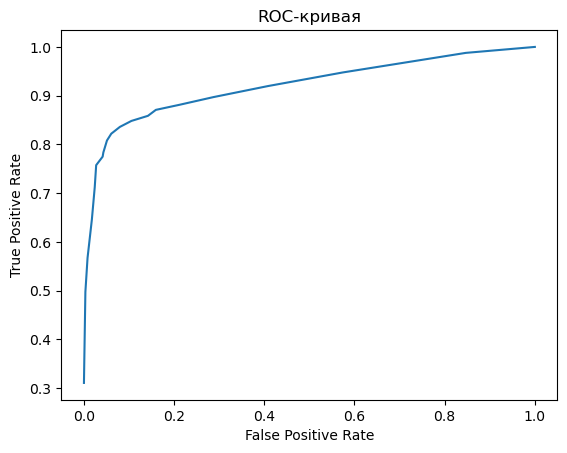

In [64]:
_fpr = []
_tpr = []
_def = []

for _ in range(0, 100, 5):
    y_pred_ = []
    for p in list(thresh[0]):
        if p > _ / 100:
            y_pred_.append(1)
        else:
            y_pred_.append(0)
            
    _df = pd.DataFrame({'y': list(y_targ['toxic']), 'y_pred': y_pred_})
    _TP = _df.loc[(_df['y'] == 1) & (_df['y_pred'] == 1)]
    _FP = _df.loc[(_df['y'] == 0) & (_df['y_pred'] == 1)]
    _FN = _df.loc[(_df['y'] == 1) & (_df['y_pred'] == 0)]
    _TN = _df.loc[(_df['y'] == 0) & (_df['y_pred'] == 0)]

    _fpr.append(len(_FP) / (len(_FP) + len(_TN)))
    _tpr.append(len(_TP) / (len(_TP) + len(_FN)))

plt.plot(_fpr, _tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-кривая')
plt.show() 

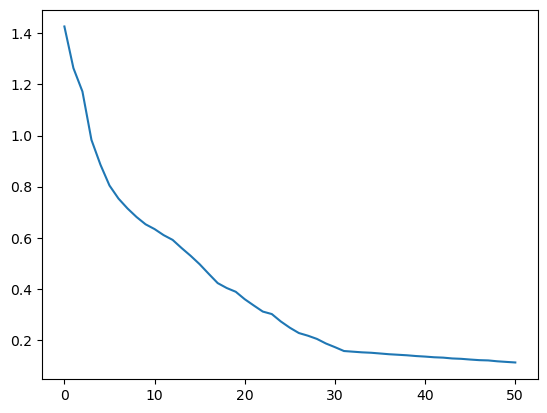

In [65]:
plt.plot(loss[0])